## We import the modules that we will to use

In [13]:
from common import sys, os, seaborn as sns, plt

In [2]:

module_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(module_path)

In [3]:
from modules.custom_functions import generate_visualization

## We check DataFrame

In [9]:
%store -r df
df.head(10)

,Id,Title,ReleaseDate,Team,Rating,TimesListed,NumberofReviews,Genres,Plays,Playing,Backlogs,Wishlist
1252,1252,Elden Ring: Shadow of the Erdtree,releases on TBD,"FromSoftware, Bandai Namco Entertainment",4.8,18,18,"Adventure, RPG",1,0,39,146
1090,1090,The Great Ace Attorney 2: Resolve,"Aug 03, 2017",Capcom,4.6,386,386,"Adventure, Point-and-Click, Puzzle, Visual Novel",1100,75,771,468
1153,1153,Dwarf Fortress,"Dec 06, 2022","Bay 12 Games, Kitfox Games",4.6,48,48,"Indie, RPG, Simulator, Strategy",225,80,181,195
1104,1104,Sekiro: Shadows Die Twice - GOTY Edition,"Oct 28, 2020","Activision, FromSoftware",4.6,173,173,"Adventure, Brawler, RPG",1400,153,461,373
43,43,Outer Wilds,"May 28, 2019","Mobius Digital, Annapurna Interactive",4.6,1800,1800,"Adventure, Indie, Puzzle, Simulator",7700,661,4800,3100
717,717,Hitman World of Assassination,"Jan 26, 2023","Inlusio Interactive, IO Interactive",4.6,38,38,"Adventure, Shooter, Tactical",167,47,54,54
1073,1073,Final Fantasy XIV: Shadowbringers,"Jul 02, 2019",Square Enix,4.6,401,401,RPG,3000,192,517,267
297,297,Bloodborne: The Old Hunters,"Nov 24, 2015","FromSoftware, Sony Computer Entertainment",4.6,266,266,"Adventure, RPG",4400,68,930,616
804,804,Disco Elysium: The Final Cut,"May 01, 2020",ZA/UM,4.6,1100,1100,"Adventure, Indie, RPG",6000,1200,5000,2700
894,894,Disco Elysium,"Oct 15, 2019",ZA/UM,4.6,1100,1100,"Adventure, RPG, Turn Based Strategy",4000,478,2800,1900


## We make a copy of the columns that are numeric

In [5]:
df_cols_numeric = df.iloc[:, [4, 5, 6, 8, 9, 10, 11]].copy()
df_cols_numeric.head()

,Rating,TimesListed,NumberofReviews,Plays,Playing,Backlogs,Wishlist
1252,4.8,18,18,1,0,39,146
1090,4.6,386,386,1100,75,771,468
1153,4.6,48,48,225,80,181,195
1104,4.6,173,173,1400,153,461,373
43,4.6,1800,1800,7700,661,4800,3100


## Description of the numeric columns

In [6]:
df_cols_numeric.describe()

,Rating,TimesListed,NumberofReviews,Plays,Playing,Backlogs,Wishlist
count,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000,1099.000000
mean,3.611920,603.825296,603.825296,4956.270246,185.051865,1159.906278,606.782530
std,0.666772,559.380153,559.380153,4959.818607,319.286354,1124.528221,656.925418
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000
25%,3.300000,233.000000,233.000000,1500.000000,32.000000,382.000000,178.000000
50%,3.700000,439.000000,439.000000,3300.000000,80.000000,771.000000,402.000000
75%,4.000000,775.000000,775.000000,6700.000000,196.000000,1600.000000,759.000000
max,4.800000,4300.000000,4300.000000,33000.000000,3800.000000,8300.000000,5400.000000


## Visualizations of the Dataframe

**The distribution of columns is not symmetric**

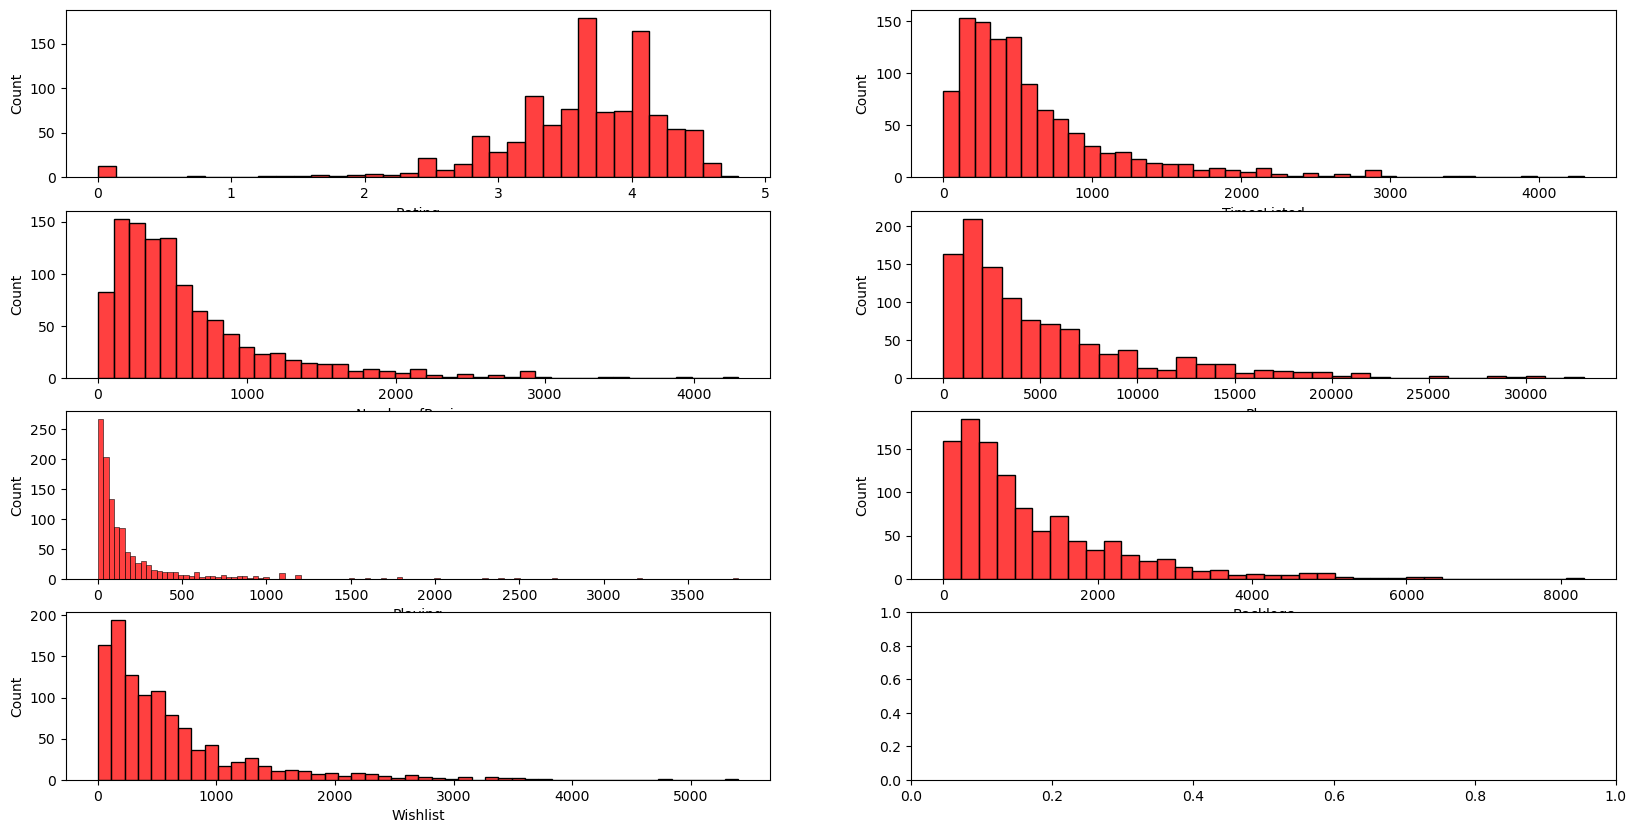

In [7]:
fig, ax = generate_visualization(df_cols_numeric, df_cols_numeric.columns, "histplot")

**There are some columns that have a lot of outliers**

<Axes: >

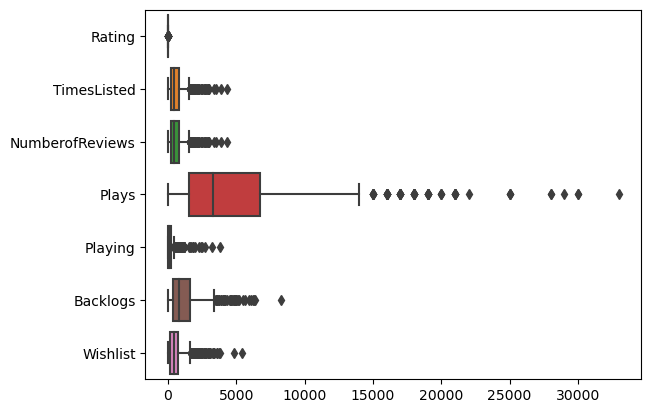

In [8]:
sns.boxplot(data = df_cols_numeric, orient = "h")

**Videogames with the most players playing**

Text(0.5, 1.0, 'Top 5 games with more players playing')

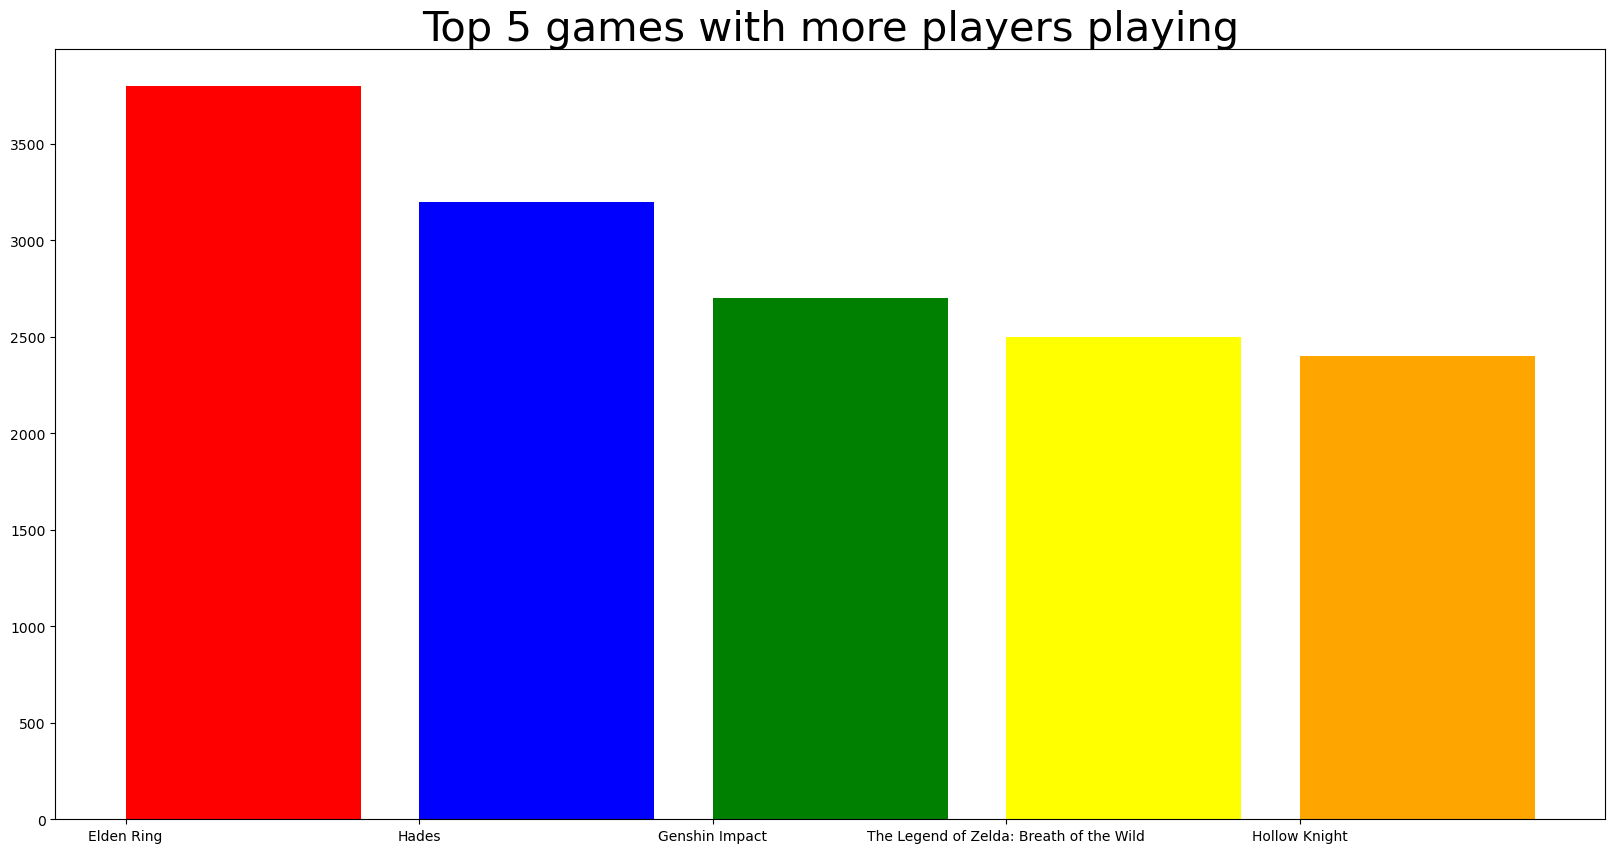

In [38]:
df_more_plays = df.sort_values(by = "Playing", ascending = False).copy()

fig, ax = plt.subplots(1, 1, figsize = (20, 10))
ax.bar(x = df_more_plays["Title"].head(5), height = df_more_plays["Playing"].head(5), 
       align = "edge", color = ["red", "blue", "green", "yellow", "orange"])

ax.set_title("Top 5 games with the most players playing", fontsize = 30)


**I used pairplot to check if there were any correlations** \
**ALERT: THE VISUALIZATION IS SO BIG**

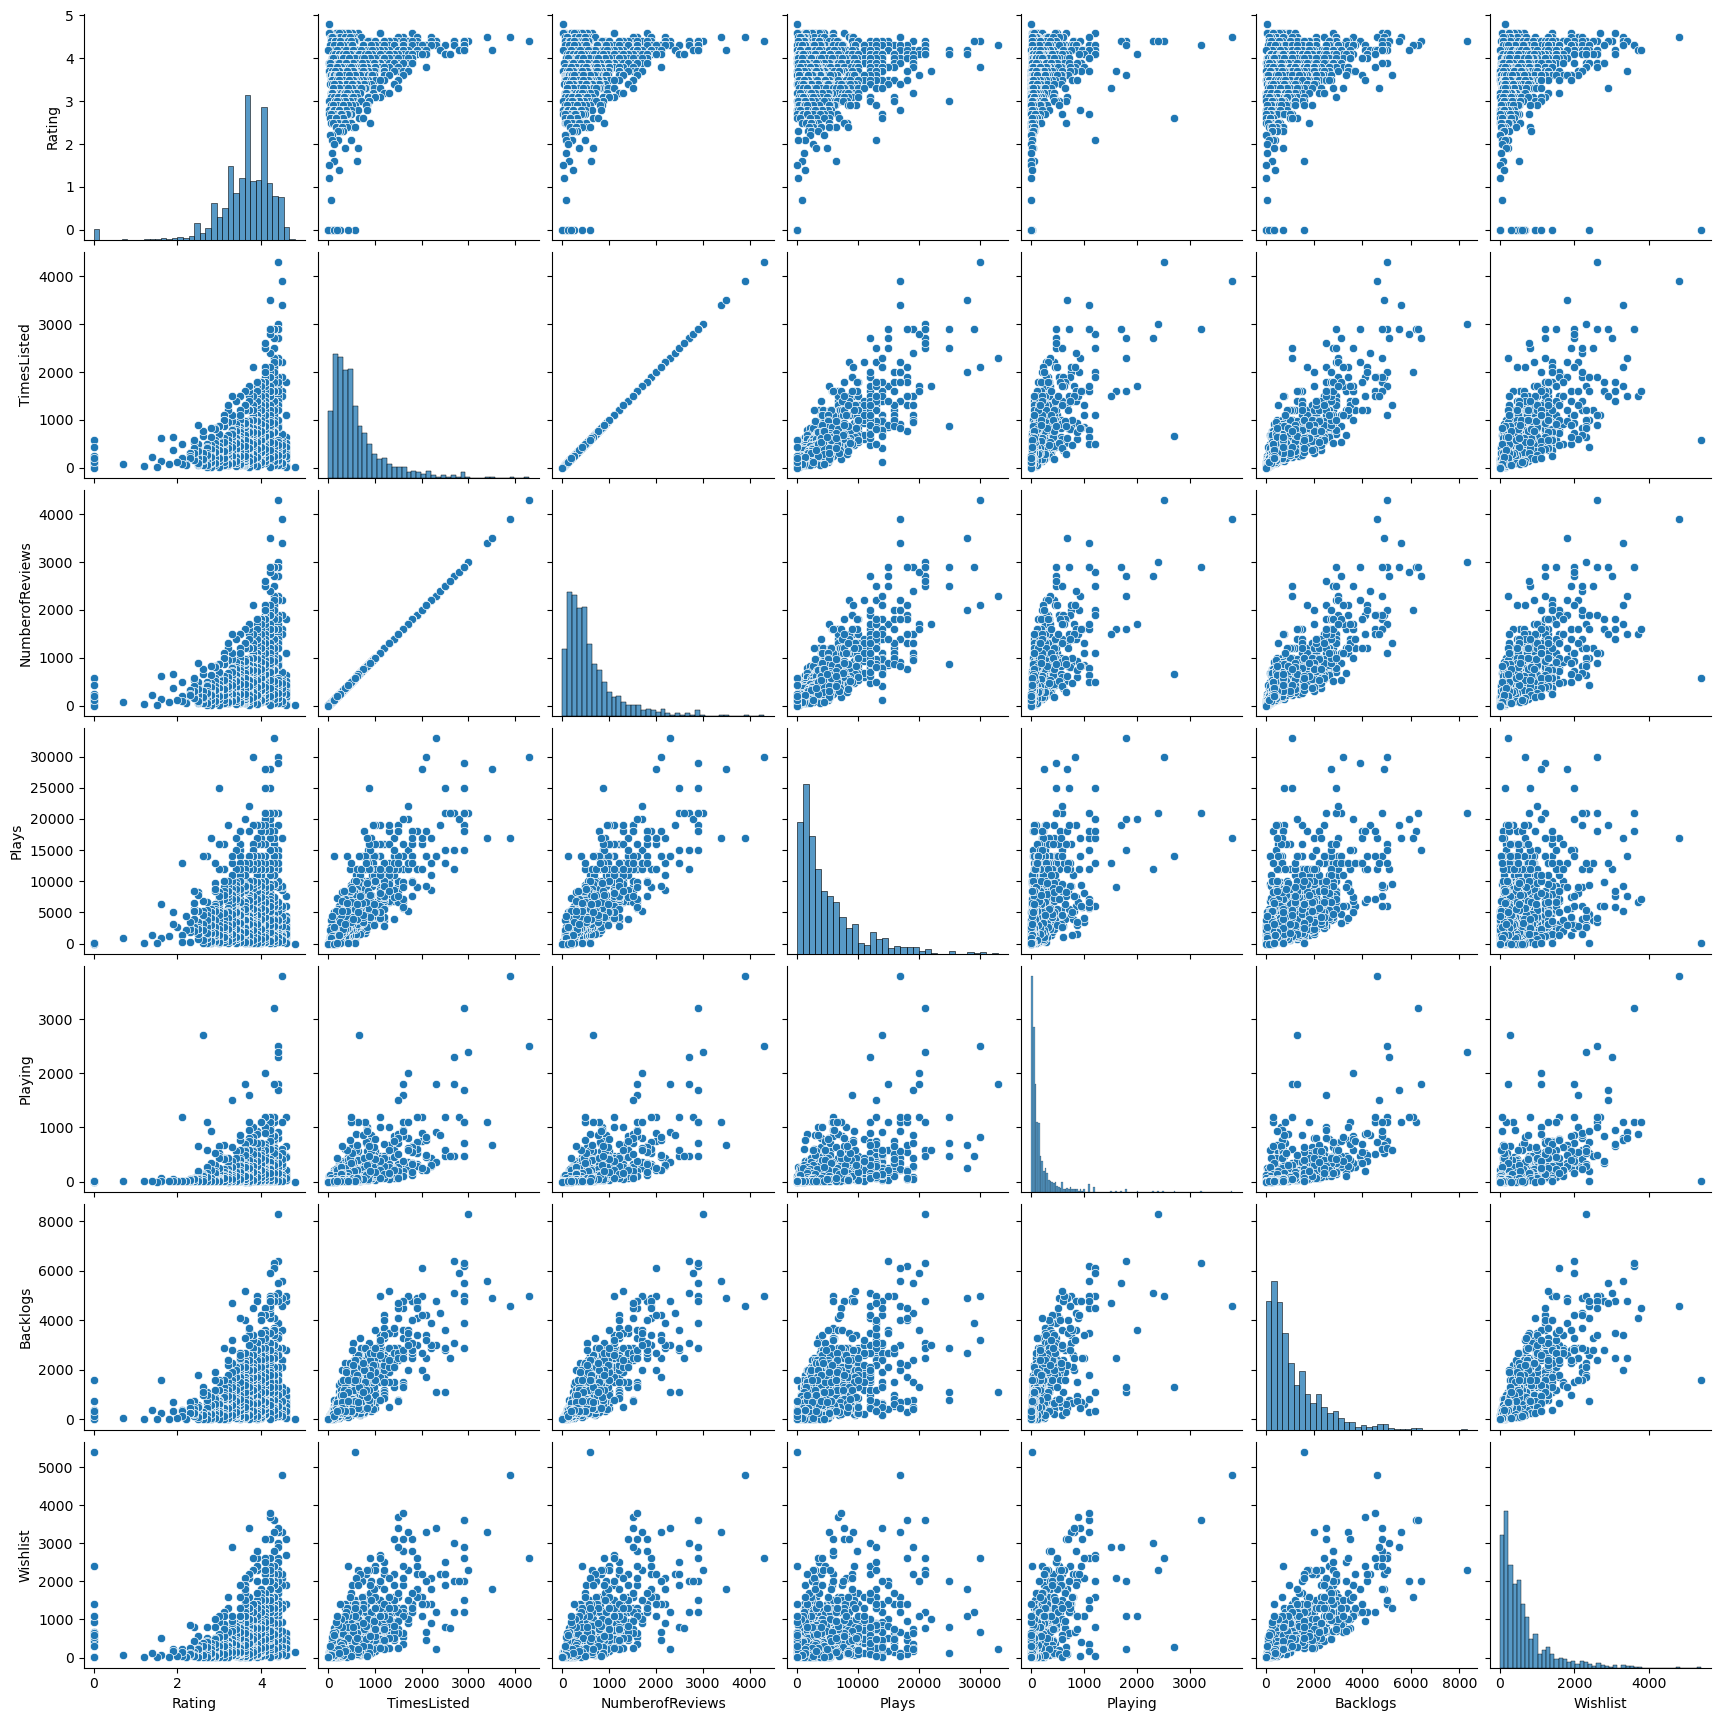

In [47]:
sns.pairplot(df_cols_numeric)

**There is some correlations between the columns**

- NumberofReviews | Backlogs
- NumberofRevies | Wishlist
- NumberofReviews | Plays
- TimeListed | Wishlist
- TimeListed | Backlogs
- TImeListed | Plays
- PLays | Backlogs
- Backlogs | Wishlist

Some are not 100%

**With the following visualizations, we can see that the correlations are not significant for all columns**

<Axes: >

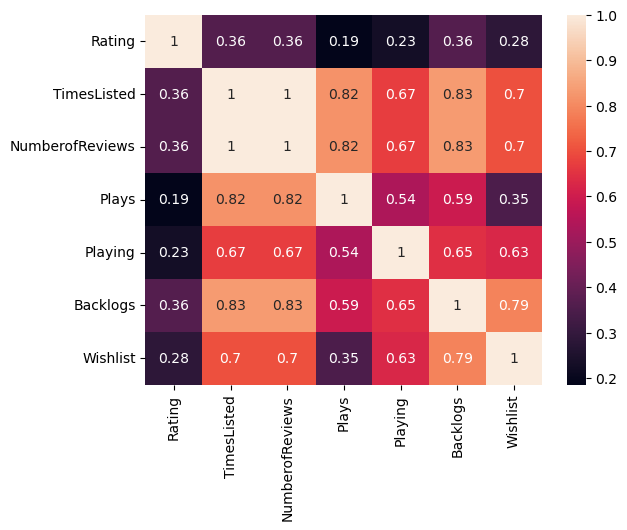

In [49]:
sns.heatmap(df_cols_numeric.corr(), annot = True)